In [2]:
#%matplotlib ipympl
import matplotlib as mpl
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ioff()
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [28]:
1+4

5

In [4]:
import numpy as np
import pint

In [5]:
from collections import namedtuple

In [6]:
import math

In [7]:
def colorbar(mappable):
    r"""Constructs a scaled colorbar for a given plot.
    
    Parameters
    ----------
    mappable : The Image, ContourSet, etc. to which the colorbar applies.
    """
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

In [13]:
# Dummy data
uu = np.linspace(0, np.pi, 128)
data = np.cos(uu - 0.5) * np.cos(uu.reshape(-1, 1) - 1.0)

In [14]:
uu

array([ 0.        ,  0.02473695,  0.0494739 ,  0.07421085,  0.0989478 ,
        0.12368475,  0.1484217 ,  0.17315865,  0.1978956 ,  0.22263255,
        0.2473695 ,  0.27210645,  0.2968434 ,  0.32158035,  0.3463173 ,
        0.37105425,  0.3957912 ,  0.42052815,  0.4452651 ,  0.47000205,
        0.494739  ,  0.51947595,  0.5442129 ,  0.56894985,  0.5936868 ,
        0.61842375,  0.6431607 ,  0.66789765,  0.6926346 ,  0.71737155,
        0.7421085 ,  0.76684545,  0.7915824 ,  0.81631935,  0.8410563 ,
        0.86579325,  0.8905302 ,  0.91526715,  0.9400041 ,  0.96474105,
        0.989478  ,  1.01421495,  1.0389519 ,  1.06368885,  1.0884258 ,
        1.11316275,  1.1378997 ,  1.16263665,  1.1873736 ,  1.21211055,
        1.2368475 ,  1.26158445,  1.2863214 ,  1.31105835,  1.3357953 ,
        1.36053225,  1.3852692 ,  1.41000615,  1.4347431 ,  1.45948005,
        1.484217  ,  1.50895395,  1.5336909 ,  1.55842785,  1.5831648 ,
        1.60790175,  1.6326387 ,  1.65737565,  1.6821126 ,  1.70

In [9]:
def plot2d(fig, data, h_axis, v_axis, param):
    ax = fig.axes[0]
    param['extent'] = [np.min(h_axis), np.max(h_axis), np.min(v_axis), np.max(v_axis)]
    
    im = ax.imshow(data, origin='lower',
               extent = param['extent'],
               aspect='auto',
               interpolation='none',
               cmap=param['cmap'])

    ax.set_xlabel(param['xlabel'])
    ax.set_ylabel(param['ylabel'])

    if param['cbar']:
        cbar = colorbar(im)
        cbar.set_label(param['zlabel'])    

In [10]:
fig_image, ax = plt.subplots(figsize=(4.8, 4.8))

In [11]:
plot2d(fig_image, data, uu, uu, {'cmap':'coolwarm',
                          'xlabel':r'$x$ ($\mu$m)',
                          'ylabel':r'$y$ ($\mu$m)',
                          'zlabel':r'$\rho$ (cm$^{-3}$)',
                          'cbar':True})

<IPython.core.display.Javascript object>


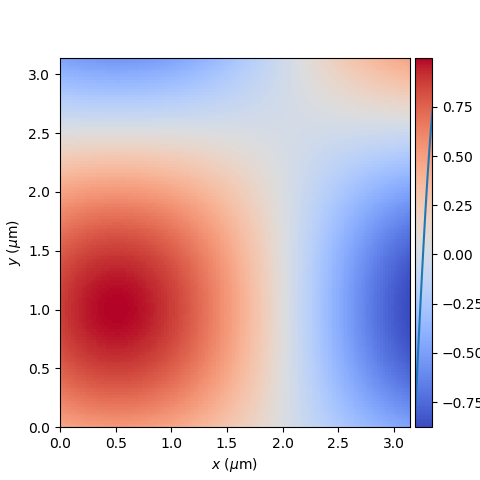

In [12]:
fig_image

In [12]:
def plot2d_wslice(data, h_axis, v_axis, param, slice_opts):
    # Figure with two (x-sharing) axes of different height
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(4.8, 6.4), sharex=True,
                               gridspec_kw={'height_ratios': [2, 1]})

    # Imshow global view
    plot2d(fig, data, h_axis, v_axis, param)
    ax0.set_xlabel('')
    # Just to show where the slice is done
    ax0.axhline(y=v_axis[v_axis.shape[0]//2], **slice_opts)

    # Slice Profile
    ax1.set_xmargin(0)  # otherwise ax0 may have white margins
    ax1.set_ylabel(param['zlabel'])
    ax1.set_xlabel(param['xlabel'])
    ax1.plot(h_axis, data[data.shape[0]//2], **slice_opts)

    # Tweak a bit the figure layout
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.04)
    
    return fig

In [13]:
fig_slice = plot2d_wslice(data, uu, uu, {'cmap':'coolwarm',
                                         'xlabel':r'$x$ ($\mu$m)',
                                         'ylabel':r'$y$ ($\mu$m)',
                                         'zlabel':r'$\rho$ (cm$^{-3}$)',
                                         'cbar':False},
                          {'ls': '--', 'color': '0.5'})

<IPython.core.display.Javascript object>


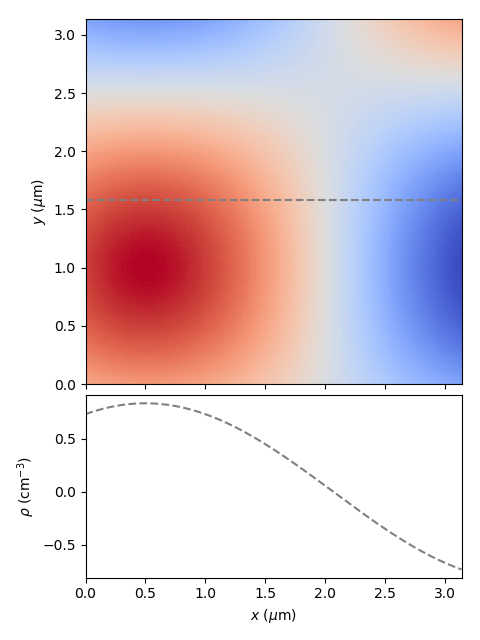

In [14]:
fig_slice

In [15]:
def plot1d_break_x(fig, h_axis, v_axis, param, slice_opts):
    ax_left = fig.axes[0]
    divider = make_axes_locatable(ax_left)
    ax_right = divider.new_horizontal(size="100%", pad=1)
    fig.add_axes(ax_right)

    ax_left.plot(h_axis, v_axis, **slice_opts)
    ax_left.set_ylabel(param['ylabel'])
    ax_left.set_xlabel(param['xlabel'])

    ax_left.set_xlim(*param['xlim_left'])
    ax_left.yaxis.tick_left()
    ax_left.tick_params(labelright='off')
    ax.spines['right'].set_visible(False)

    ax_right.plot(h_axis, v_axis, **slice_opts)
    ax_right.set_ylabel(param['ylabel'])
    ax_right.set_xlabel(param['xlabel'])
    ax_right.yaxis.set_label_position("right")
    
    ax_right.set_xlim(*param['xlim_right'])
    ax_right.yaxis.tick_right()
    ax_right.spines['left'].set_visible(False)

    # From https://matplotlib.org/examples/pylab_examples/broken_axis.html
    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax_left.transAxes, color='k', clip_on=False)
    ax_left.plot((1-d,1+d), (-d,+d), **kwargs)
    ax_left.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax_right.transAxes)  # switch to the right axes
    ax_right.plot((-d,+d), (1-d,1+d), **kwargs)
    ax_right.plot((-d,+d), (-d,+d), **kwargs)

In [20]:
fig_break, ax = plt.subplots(figsize=(8, 3.2))

In [21]:
plot1d_break_x(fig_break, uu, data[data.shape[0]//2], {'xlim_left':(0,1), 'xlim_right':(2,3),
                                                     'xlabel':r'$x$ ($\mu$m)',
                                                     'ylabel':r'$\rho$ (cm$^{-3}$)'},
               {'ls': '--', 'color': '0.5'})

<IPython.core.display.Javascript object>


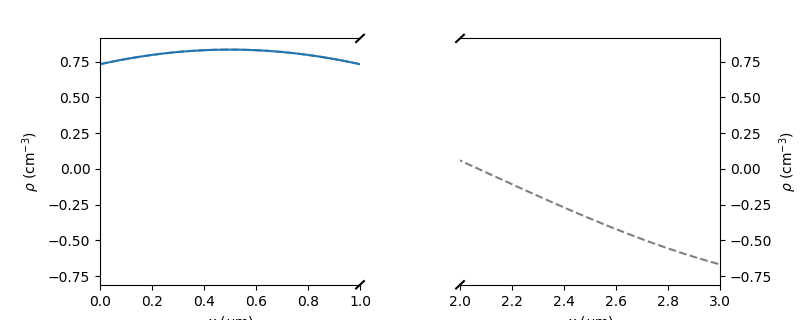

In [26]:
fig_break

In [27]:
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

In [28]:
# append the new definitions
ureg.load_definitions('./lwfa_def.txt')

In [29]:
# parameters from EPOCH input file

# lengths in micrometers
# times in femtoseconds
# densities in 1/cm**3

# plasma up ramp length
url = 100 * ureg.micrometer
# plasma flat-top length
ftl = 2450 * ureg.micrometer
# plasma skin depth
psd = 2.6575 * ureg.micrometer

# grid resolution
cells_x = 1024
cells_y = 96
cells_z = 96

# moving box limits
x_min = -100 * ureg.micrometer
x_max = -50 * ureg.micrometer
#
y_min = -400 * ureg.micrometer
y_max =  400 * ureg.micrometer
#
z_min = -400 * ureg.micrometer
z_max =  400 * ureg.micrometer

# speed of the window
window_v_x =   0.29919287308 * ureg.micrometer/ureg.femtosecond
# time at which the window should start moving
window_start_time =  166.78204759999997 * ureg.femtosecond

# final simulation time
t_end =  9041.7551465 * ureg.femtosecond

In [30]:
Point = namedtuple('Point', ['x', 'y', 'z'])
NrGridPoints = namedtuple('NrGridPoints', ['x', 'y', 'z'])
WindowProp = namedtuple('WindowProp', ['v_x','t_start','t_end'])

In [31]:
class Grid:
    def __init__(self, left_edge, right_edge, nr_points):
        self._le = left_edge
        self._re = right_edge
        self._np = nr_points
        
        # box axes
        Box = namedtuple('Box', ['x', 'y', 'z'])
        self.box = Box(x = self._linspace('x'),
                       y = self._linspace('y'),
                       z = self._linspace('z'))
        
        # box size
        Width = namedtuple('Width', ['x', 'y', 'z'])
        self.width = Width(x = self._width('x'),
                          y = self._width('y'),
                          z = self._width('z'))
        
    def _linspace(self, axis):
        return np.linspace(getattr(self._le, axis), getattr(self._re, axis), getattr(self._np,axis))
    
    def _width(self, axis):
        return getattr(self._re, axis) - getattr(self._le, axis)

In [32]:
class MovingWindow(Grid):
    def __init__(self, win_prop, *args, **kwargs):
        self._prop = win_prop
        super().__init__(*args, **kwargs)

In [33]:
class Domain(Grid):
    def __init__(self, moving_window):
        self.mw = moving_window        
        redge = self._get_right_edge()
        self.npoints = self._get_nr_points(redge)

        super().__init__(self.mw._le, redge, self.mw._np)
    
    def _get_right_edge(self):
        # total moving time of the window
        delta_t = self.mw._prop.t_end - self.mw._prop.t_start
        # corresponding distance
        dist = delta_t * self.mw._prop.v_x
        # new x limit of domain
        x_max = self.mw._re.x + dist
        return Point(x_max, self.mw._re.y, self.mw._re.z)
    
    def _get_nr_points(self, re):
        # resolution along x direction
        delta_x = self.mw.width.x / (self.mw._np.x - 1)
        # width of the full domain along x
        width_x = re.x - self.mw._le.x
        n = width_x / delta_x
        assert n.dimensionless, 'length units error!'
        nx = math.trunc(n.magnitude + 1)
        return NrGridPoints(nx, self.mw._np.y, self.mw._np.z)

In [34]:
class Plasma:
    def __init__(self, plasma_skin_depth, up_ramp_length, flat_top_length):
        self.skin_depth = plasma_skin_depth
        self.url = up_ramp_length
        self.ftl = flat_top_length        
        self.time_unit = self.skin_depth.to('femtosecond', 'lwfa')
        self.frequency = self.skin_depth.to('terahertz', 'lwfa')
        self.density = self.skin_depth.to('1/cm**3', 'lwfa')
        
    def __repr__(self):
        return 'Plasma(plasma_skin_depth={}, up_ramp_length={}, flat_top_length={})'.format(self.skin_depth, self.url, self.ftl)
    
    def __str__(self):
        return 'Plasma with skin depth {}, time unit {}, frequency {} and density {}.'.format(self.skin_depth, self.time_unit, self.frequency, self.density)

In [35]:
class Species:
    def __init__(self, domain, plasma, n):
        self._dom = domain
        self._pl = plasma
        self.rho_min = n * self._pl.density
        self.rho = self.build_density(self._dom.box, 
                                      self._pl.url.magnitude, 
                                      self._pl.ftl.magnitude,
                                      self._dom.width.y.magnitude / 2,
                                      self._pl.density.magnitude)
        
    
    def build_density(self, box, url, ftl, half_width, density_unit):
        x, y, z = tuple(getattr(box, ax) for ax in ('x', 'y', 'z'))        
        shape = tuple(v.shape[0] for v in (y, x, z))  
        rho = np.zeros(shape)

        rho[...] = np.where(np.logical_or(x <= -url, x >= ftl + url), 0, 1)[np.newaxis, :, np.newaxis]

        cond = (x > -url) & (x < 0)
        rho[:, cond, :] = ((1 + np.cos(x * math.pi / url)) / 2)[np.newaxis, cond, np.newaxis]

        cond = (x > ftl) & (x < ftl + url)
        rho[:, cond, :] = ((1 + np.cos((x - ftl) * math.pi / url)) / 2)[np.newaxis, cond, np.newaxis]

        cond_y = np.abs(y) > 0.99 * half_width
        cond_z = np.abs(z) > 0.99 * half_width
        rho[cond_y, :, :] = 0
        rho[:, :, cond_z] = 0
        
        rho *= density_unit
        return rho

In [39]:
# test domain
mmovingwin = MovingWindow(WindowProp(0.29919287308 * ureg.micrometer/ureg.femtosecond, 166.78204759999997 * ureg.femtosecond, 9041.7551465 * ureg.femtosecond),
                          Point(-100 * ureg.micrometer, -400 * ureg.micrometer, -400 * ureg.micrometer),
                          Point(-50 * ureg.micrometer, 400 * ureg.micrometer, 400 * ureg.micrometer),
                          NrGridPoints(1024, 96, 96))
ddomain = Domain(mmovingwin)

assert ddomain.mw.width.x == 50.0 * ureg.micrometer, 'box x length is wrong!'
assert ddomain.mw.width.y / 2.0 == 400.0 * ureg.micrometer, 'box y length is wrong!'
assert ddomain.mw.box.x.shape == (1024, ), 'size error!'
assert ddomain.npoints.x == 55352 and math.isclose(ddomain.width.x.magnitude, 2705.3286999676016), 'size error!'
#assert math.isclose(np.diff(ddomain.box.x)[0], np.diff(ddomain.mw.box.x)[0], rel_tol=1e-6), 'resolution error!'

# test plasma density
pplasma = Plasma(2.6575 * ureg.micrometer, 100. * ureg.micrometer, 2450. * ureg.micrometer)
assert math.isclose(pplasma.density.magnitude, 3.9986353164000005e+18, rel_tol=1e-5), 'the density_unit is wrong!'

# test minimum electron density
eelectron = Species(ddomain, pplasma, 1e-3)
assert math.isclose(eelectron.rho_min.magnitude, 3998635316400000.5, rel_tol=1e-5), 'the electron minimal density is wrong!'

In [40]:
# TODO: make it work without units
# TODO: add units to arrays
# TODO: units checks via pint
# TODO: define epoch's if()

In [41]:
p_min = Point(x_min, y_min, z_min)
p_max = Point(x_max, y_max, z_max)

shape = (cells_x, cells_y, cells_z)
ncells = NrGridPoints(*shape)
winprop = WindowProp(window_v_x, window_start_time, t_end)

mw = MovingWindow(winprop, p_min, p_max, ncells)
dom = Domain(mw)
preplasma = Plasma(psd, url, ftl)
electron = Species(dom, preplasma, 1e-3)

In [48]:
pm = {'cmap':'viridis', 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$y$ ($\mu$m)', 'zlabel':r'$\rho$ (cm$^{-3}$)', 'cbar':False}
so = {'ls': '--', 'color': '0.5'}
fig = plot2d_wslice(np.sum(electron.rho, axis=2), dom.box.x, dom.box.y, pm, so)

<IPython.core.display.Javascript object>


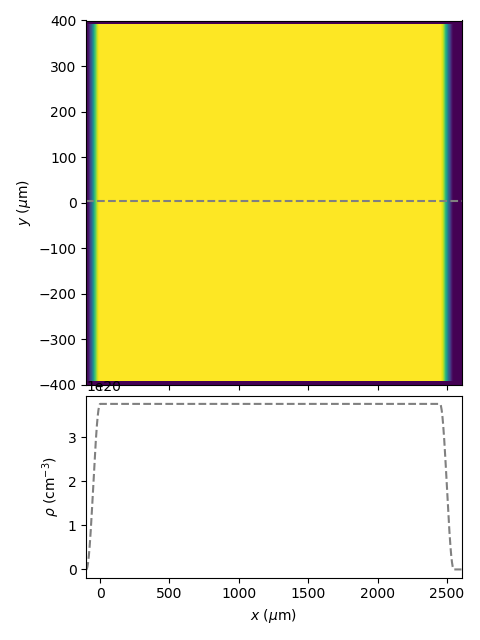

In [49]:
fig

In [52]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
r = np.sum(electron.rho, axis=2)
i = math.trunc(r.shape[0]/2)

axes[0].scatter(dom.box.x[:100], r[i,:100], s=0.5)
axes[1].scatter(dom.box.x[-100:], r[i,-100:], s=0.5)

In [123]:
fig, ax = plt.subplots(figsize=(8, 3.2))

In [124]:
xr = dom.box.x[-1]
pm = {'xlim_left':(-preplasma.url.magnitude, 0 + 50), 'xlim_right':(preplasma.ftl.magnitude - 50, preplasma.url.magnitude + preplasma.ftl.magnitude), 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$\rho$ (cm$^{-3}$)'}
so = {'ls': '--', 'color': '0.5'}
r = np.sum(electron.rho, axis=2)
i = r.shape[0]//2
plot1d_break_x(fig, dom.box.x, r[i], pm, so)

In [127]:
ax.axvspan(mw.box.x[0], mw.box.x[-1], alpha = 0.2, color='red')

<IPython.core.display.Javascript object>


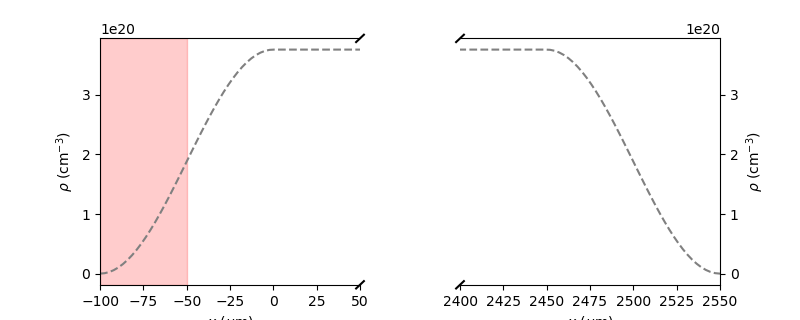

In [128]:
fig

In [15]:
np.linspace?

In [ ]:
# laser parameters
# laser strength parameter
laser_a0 = 3.
laser_wavelength = 0.8 * micrometer   # ^^^
laser_omega = 2 * pi * c / laser_wavelength # ras/s
laser_frequency = laser_omega / (2*pi)
# waist at focus
laser_waist = 20 * micrometer
laser_duration = 20 * fs
# amplitude of the electric field
laser_amp = laser_a0 * laser_omega * (me * c / qe)
laser_intensity = (c * e0) / 2 * laser_amp**2
laser_power = laser_intensity * (pi * laser_waist**2 / 2)
laser_energy = laser_power * laser_duration

In [ ]:
print('f = ', convert_to(laser_frequency, terahertz).n())
print('w_0 = ', convert_to(laser_waist, micrometer))
print('E_L = ', convert_to(laser_amp, teravolt/meter).n())
print('I = ', convert_to(laser_intensity, watt/centimeter**2).n())
print('P = ', convert_to(laser_power, terawatt).n())
print('tau_0 = ', convert_to(laser_duration, femtosecond))
print('E = ', convert_to(laser_energy, joule).n())
print('lambda = ', convert_to(laser_wavelength, nanometer))

In [17]:
x = np.linspace(0, 2*math.pi, 100)

<IPython.core.display.Javascript object>


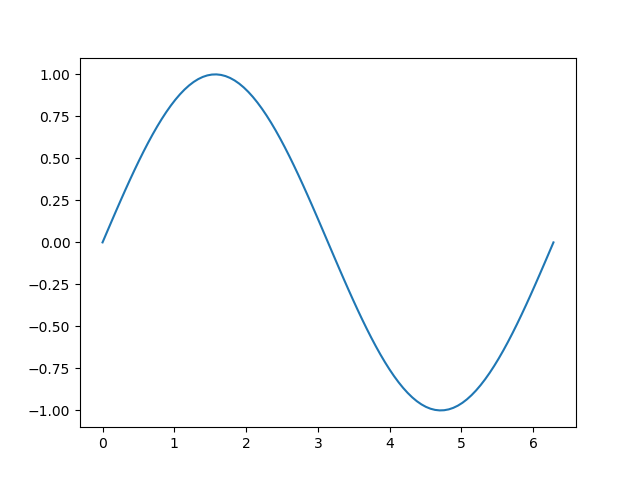

In [27]:
plt.plot(x, np.sin(x))

In [26]:
plt.ion()

In [25]:
x[::2]

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879])